## Importing modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import date
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
ecom_data = pd.read_csv("E-Commerce.csv")

## Data Preprocessing

In [3]:
ecom_data.head(5)

,Customer_uniq_id,Region,Order_Date,Expected_Delivery_Date,Delivered_Date,product_name,product_main_category,product_subcategory,product_category_filter,product_category_subfilter,product_unique ID,retail_price,discounted_price,product_rating,Brand,product_specifications,description
0,e71017e224688489edfe856f2308806d,East,24-10-2021,25-10-2021,25-10-2021,Indcrown Net Embroidered Semi-stitched Lehenga...,Clothing,Women's Clothing,Ethnic Wear,Fabric,FABEJX2NHNKCYHKA,999,699,4.0,INDCROWN,"{""product_specification""=>[{""key""=>""Fabric"", ""...",Key Features of Indcrown Net Embroidered Semi-...
1,6286847ee2da18f587503db49511c539,East,24-10-2021,25-10-2021,25-10-2021,Shopmania Music Band A5 Notebook Spiral Bound,Pens & Stationery,Diaries & Notebooks,Notebooks,Designer,DIAEJ6Z8BEDTGGYY,499,275,1.0,SHOPMANIA,"{""product_specification""=>[{""key""=>""Ruling"", ""...",Specifications of Shopmania Music Band A5 Note...
2,0686fec9b70e5039583a38119ca0c835,West,24-10-2021,25-10-2021,25-10-2021,Shopmania Music Band A5 Notebook Spiral Bound,Pens & Stationery,Diaries & Notebooks,Notebooks,Designer,DIAEJ6Z8KQFWDEGH,499,275,2.0,SHOPMANIA,"{""product_specification""=>[{""key""=>""Ruling"", ""...",Specifications of Shopmania Music Band A5 Note...
3,ea2406dc597bee2abb6b867fa668501f,West,24-10-2021,25-10-2021,25-10-2021,"Tiara Diaries 2016-2017 Designer LA Kaarta ""TA...",Pens & Stationery,Diaries & Notebooks,Notebooks,Designer,DIAEJ8FGHZ3K86JU,1000,837,3.0,TIARA DIARIES,"{""product_specification""=>[{""key""=>""Ruling"", ""...",Specifications of Tiara Diaries 2016-2017 Desi...
4,5935ed077915347dc695744df68c565c,East,03-09-2021,04-09-2021,04-09-2021,KAJCI Embroidered Women's Waistcoat,Clothing,Women's Clothing,Formal Wear,Waistcoats,WSCEG2FYDYFDSVZ6,1200,699,5.0,KAJCI,"{""product_specification""=>[{""key""=>""Pattern"", ...",Specifications of KAJCI Embroidered Women's Wa...


In [4]:
ecom_row2,ecom_col2=ecom_data.shape
ecom_row2,ecom_col2

(8906, 17)

In [5]:
ecom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8906 entries, 0 to 8905
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Customer_uniq_id            8906 non-null   object 
 1   Region                      8906 non-null   object 
 2   Order_Date                  8906 non-null   object 
 3   Expected_Delivery_Date      8906 non-null   object 
 4   Delivered_Date              8906 non-null   object 
 5   product_name                8906 non-null   object 
 6   product_main_category       8906 non-null   object 
 7   product_subcategory         8906 non-null   object 
 8   product_category_filter     8906 non-null   object 
 9   product_category_subfilter  8906 non-null   object 
 10  product_unique ID           8906 non-null   object 
 11  retail_price                8906 non-null   int64  
 12  discounted_price            8906 non-null   int64  
 13  product_rating              8906 

In [6]:
ecom_data.dtypes

Customer_uniq_id               object
Region                         object
Order_Date                     object
Expected_Delivery_Date         object
Delivered_Date                 object
product_name                   object
product_main_category          object
product_subcategory            object
product_category_filter        object
product_category_subfilter     object
product_unique ID              object
retail_price                    int64
discounted_price                int64
product_rating                float64
Brand                          object
product_specifications         object
description                    object
dtype: object

## Eliminating non-informative columns

In [7]:
ecom_data.drop(['product_specifications','description'],axis=1,inplace=True)
ecom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8906 entries, 0 to 8905
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Customer_uniq_id            8906 non-null   object 
 1   Region                      8906 non-null   object 
 2   Order_Date                  8906 non-null   object 
 3   Expected_Delivery_Date      8906 non-null   object 
 4   Delivered_Date              8906 non-null   object 
 5   product_name                8906 non-null   object 
 6   product_main_category       8906 non-null   object 
 7   product_subcategory         8906 non-null   object 
 8   product_category_filter     8906 non-null   object 
 9   product_category_subfilter  8906 non-null   object 
 10  product_unique ID           8906 non-null   object 
 11  retail_price                8906 non-null   int64  
 12  discounted_price            8906 non-null   int64  
 13  product_rating              8906 

### Unique Brand 

In [8]:
ecom_data.Brand.unique()

array(['INDCROWN', 'SHOPMANIA', 'TIARA DIARIES', ..., 'SININA',
       'AARUSHI FASHION', 'AMBIKA LAHENGA'], dtype=object)

### Average product_rating within each Brand 

In [9]:
ecom_data_copy3 = ecom_data.groupby('Brand').agg({'product_name':'count', 'product_rating': 'sum',})
ecom_data_copy3=ecom_data_copy3.reset_index()
ecom_data_copy3['average']=ecom_data_copy3.product_rating/ecom_data_copy3.product_name
ecom_data_copy3

,Brand,product_name,product_rating,average
0,1OAK,2,3.0,1.500000
1,3A AUTOCARE,41,134.0,3.268293
2,3D MAT,1,3.0,3.000000
3,3KFACTORY,1,2.0,2.000000
4,4D,5,18.0,3.600000
...,...,...,...,...
2479,ZORDEN,1,4.0,4.000000
2480,ZOSIGN,5,17.0,3.400000
2481,ZRESTHA,1,1.0,1.000000
2482,ZYXEL,9,30.0,3.333333


### Count of items ordered for each product_main_category

In [10]:
plt.figure(figsize=(150,60))
plt.title('barplot:product_main_category',size=100)
sns.countplot(data=ecom_data, x='product_main_category', order=ecom_data['product_main_category'].value_counts().index)
plt.xlabel('product_main_category',size=100)
plt.ylabel('count',size=100)
plt.xticks(rotation=90)
plt.xticks(size=105)
plt.yticks(size=65)
plt.show()

### Max and min of product_main_category

In [11]:
#from the plot it is observed top 2 categories are: clothing , moblie and accessories
#bottom 2 categories are food&nutrion and wearable smart devies
plt.figure(figsize=(150,60))
sns.countplot(data=ecom_data, x='product_main_category', order=ecom_data['product_main_category'].value_counts().index)
plt.xticks(rotation=90)
plt.xticks(size=100)
plt.yticks(size=65)
plt.show()

### Top 5 product_main_category(s) in descending order

In [12]:
order1=ecom_data['product_main_category'].value_counts()
order1.head(5)

product_main_category
Clothing                       2943
Mobiles & Accessories          1084
Automotive                     1001
Home Decor & Festive Needs      727
Computers                       558
Name: count, dtype: int64

### Total Revenue generated by the E-Commerce company over all orders placed.

In [13]:
a1=(ecom_data.loc[(ecom_data.discounted_price>600),'discounted_price'].sum()*0.25)
a2=(ecom_data.loc[(ecom_data.discounted_price>350)&(ecom_data.discounted_price<=600),'discounted_price'].sum()*0.15)
a3=(ecom_data.loc[(ecom_data.discounted_price>100)&(ecom_data.discounted_price<=350),'discounted_price'].sum()*0.10)
a4=(ecom_data.loc[(ecom_data.discounted_price<=100),'discounted_price'].sum()*0.05)
Total_Revenue=a1+a2+a3+a4

In [14]:
Total_Revenue

2217486.85

### The top 10 Brand having maximum revenue in descending order 

In [15]:
ecom_data.groupby('Brand')['discounted_price']

In [16]:
ecom_data['brand_price']=np.where(ecom_data['discounted_price']>600,ecom_data['discounted_price']*0.75,
                         np.where(ecom_data['discounted_price']>350,ecom_data['discounted_price']*0.85,
                         np.where(ecom_data['discounted_price']>100,ecom_data['discounted_price']*0.90,
                         ecom_data['discounted_price']*0.95)))
ecom_data

,Customer_uniq_id,Region,Order_Date,Expected_Delivery_Date,Delivered_Date,product_name,product_main_category,product_subcategory,product_category_filter,product_category_subfilter,product_unique ID,retail_price,discounted_price,product_rating,Brand,brand_price
0,e71017e224688489edfe856f2308806d,East,24-10-2021,25-10-2021,25-10-2021,Indcrown Net Embroidered Semi-stitched Lehenga...,Clothing,Women's Clothing,Ethnic Wear,Fabric,FABEJX2NHNKCYHKA,999,699,4.0,INDCROWN,524.25
1,6286847ee2da18f587503db49511c539,East,24-10-2021,25-10-2021,25-10-2021,Shopmania Music Band A5 Notebook Spiral Bound,Pens & Stationery,Diaries & Notebooks,Notebooks,Designer,DIAEJ6Z8BEDTGGYY,499,275,1.0,SHOPMANIA,247.50
2,0686fec9b70e5039583a38119ca0c835,West,24-10-2021,25-10-2021,25-10-2021,Shopmania Music Band A5 Notebook Spiral Bound,Pens & Stationery,Diaries & Notebooks,Notebooks,Designer,DIAEJ6Z8KQFWDEGH,499,275,2.0,SHOPMANIA,247.50
3,ea2406dc597bee2abb6b867fa668501f,West,24-10-2021,25-10-2021,25-10-2021,"Tiara Diaries 2016-2017 Designer LA Kaarta ""TA...",Pens & Stationery,Diaries & Notebooks,Notebooks,Designer,DIAEJ8FGHZ3K86JU,1000,837,3.0,TIARA DIARIES,627.75
4,5935ed077915347dc695744df68c565c,East,03-09-2021,04-09-2021,04-09-2021,KAJCI Embroidered Women's Waistcoat,Clothing,Women's Clothing,Formal Wear,Waistcoats,WSCEG2FYDYFDSVZ6,1200,699,5.0,KAJCI,524.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8901,90d30478255e23621e8929ed15c2f6e4,South,01-12-2020,04-12-2020,04-12-2020,Sinina Chanderi Embroidered Salwar Suit Dupatt...,Clothing,Women's Clothing,Ethnic Wear,Fabric,FABEGGHHDFMY8BZU,2980,1490,3.0,SININA,1117.50
8902,20a73e3f41490a73ceeba5f17658db8f,West,01-12-2020,04-12-2020,04-12-2020,Aarushi Fashion Chanderi Embroidered Salwar Su...,Clothing,Women's Clothing,Ethnic Wear,Fabric,FABEG8GFDUWRSNU3,2600,1300,1.0,AARUSHI FASHION,975.00
8903,5c1554cd45f9d538c2c6947dbdd59c75,East,01-12-2020,04-12-2020,04-12-2020,"Ambika Lahenga Embroidered Lehenga, Choli and ...",Clothing,Women's Clothing,Ethnic Wear,Lehenga Cholis,LEHEGGEHYN4G2RPW,39992,24995,1.0,AMBIKA LAHENGA,18746.25
8904,6b737a4deca1ed0e56c179e66036e994,West,01-12-2020,04-12-2020,04-12-2020,Sinina Chanderi Embroidered Salwar Suit Dupatt...,Clothing,Women's Clothing,Ethnic Wear,Fabric,FABEGGHHGSVCHGFV,2000,1000,3.0,SININA,750.00


In [17]:
ecom_data['BrandRevenue']= ecom_data['discounted_price']-ecom_data['brand_price'] 
ecom_data.groupby(['Brand'])['BrandRevenue'].sum().sort_values(ascending = False).head(10)

Brand
ALLURE AUTO     166154.75
GAGA             79130.00
DAILYOBJECTS     60660.00
SLIM             60114.40
DIVINITI         47705.00
ENTHOPIA         41048.75
ASUS             33080.50
SPRINGWEL        29659.50
AUDEZE           29073.00
REGULAR          26442.50
Name: BrandRevenue, dtype: float64

### Boxplots of retail_price & discounted_price

<Axes: title={'center': 'boxplot:price of retail'}, xlabel='retail_price'>

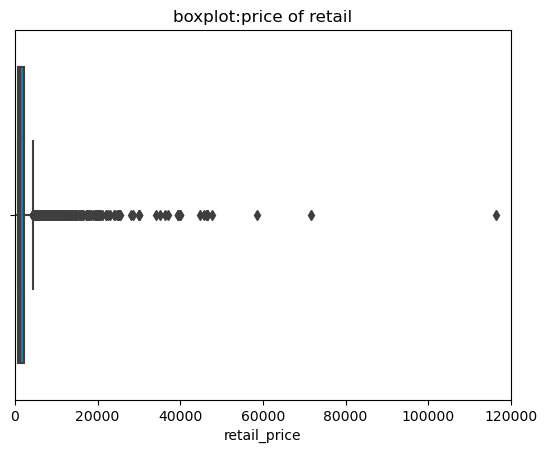

In [18]:
plt.title('boxplot:price of retail')
plt.xlim(0,120000)
plt.xlabel('retail_price')
sns.axes_style('whitegrid')
sns.boxplot(data=ecom_data, x='retail_price')

<Axes: title={'center': 'boxplot:price of discounted'}, xlabel='discounted_price'>

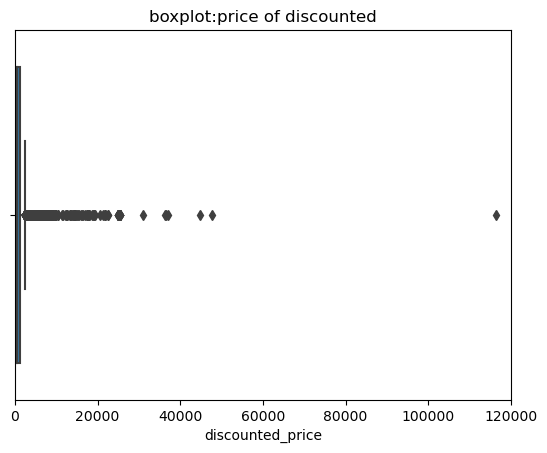

In [19]:
plt.title('boxplot:price of discounted')
plt.xlim(0,120000)
plt.xlabel('discounted_price')
sns.axes_style('whitegrid')
sns.boxplot(data=ecom_data ,x='discounted_price')

### Scatterplot of retail_price (x-axis) and discounted_price (y-axis)

<Axes: xlabel='retail_price', ylabel='discounted_price'>

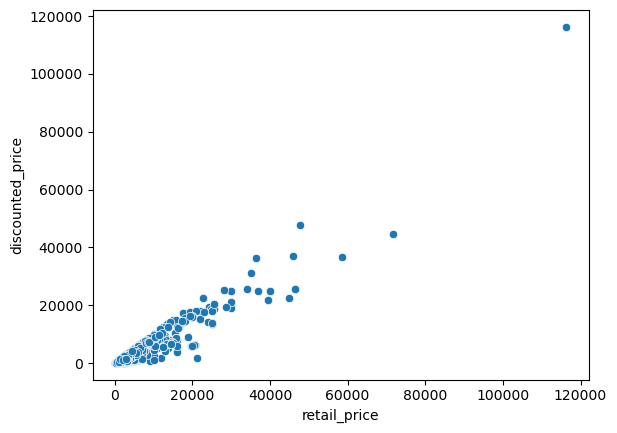

In [20]:
sns.scatterplot(data=ecom_data,x='retail_price',y='discounted_price')

### Dataframe which includes the Brand specific information as stated:

**i. total number of orders placed per Brand**

**ii. total retail_price per Brand**

**iii. total discounted_price per Brand, and**

**iv. total BrandRevenue generated per Brand.** 

In [21]:
ecom_data_copy2 = ecom_data.groupby('Brand').agg({'Customer_uniq_id':'count', 'retail_price': 'sum', 'discounted_price': 'sum', 'brand_price': 'sum'})
ecom_data_copy2=ecom_data_copy2.reset_index()
ecom_data_copy2

,Brand,Customer_uniq_id,retail_price,discounted_price,brand_price
0,1OAK,2,1698,1274,1015.40
1,3A AUTOCARE,41,107059,74134,55647.90
2,3D MAT,1,7250,6999,5249.25
3,3KFACTORY,1,399,174,156.60
4,4D,5,17500,7948,5961.00
...,...,...,...,...,...
2479,ZORDEN,1,3999,2799,2099.25
2480,ZOSIGN,5,6995,6995,5246.25
2481,ZRESTHA,1,1999,899,674.25
2482,ZYXEL,9,64742,35392,26544.00


### Pairplot

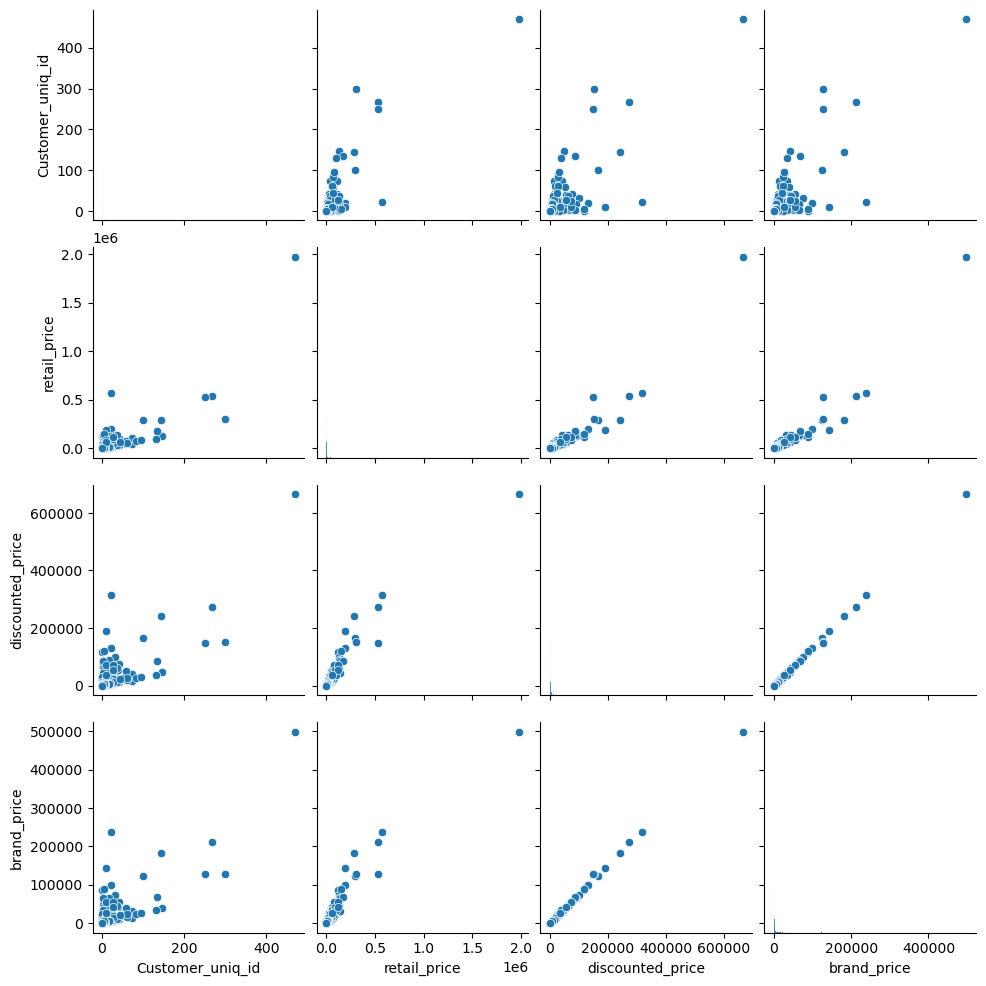

In [22]:
sns.pairplot(data=ecom_data_copy2[['Brand','Customer_uniq_id','retail_price','discounted_price','brand_price']])

## Comparing performances regionwise

### Lineplot for the monthly Revenue of E-Commerce Company for each region separately

In [23]:
ecom_data['Ecom_price']=ecom_data['discounted_price']-ecom_data['brand_price']

In [24]:
ECom_data_Add = pd.DataFrame()
ecom_data['Order_Date'] = pd.to_datetime(ecom_data.Order_Date, format='%d-%m-%Y')
ECom_data_Add['Order_Month']=ecom_data['Order_Date'].dt.strftime("%Y %m")
ECom_data_Add['Region']=ecom_data['Region'].copy()
ECom_data_Add['Ecom_price']=ecom_data['Ecom_price'].copy()
ECom_data_Add_New=pd.DataFrame(ECom_data_Add.groupby(['Region','Order_Month'])['Ecom_price'].sum())
ECom_data_Add_New

Ecom_price
Region Order_Month            
East   2020 12       363413.85
       2021 01       218740.60
       2021 02        14347.25
       2021 03       124934.10
       2021 04        56293.05
       2021 05        24230.50
       2021 06        54231.60
       2021 07          351.35
       2021 08          824.75
       2021 09          680.15
       2021 10          202.25
North  2020 12       195149.95
       2021 01        96015.10
       2021 02         7137.35
       2021 03        40733.95
       2021 04        29758.35
       2021 05        13106.50
       2021 06        29552.35
       2021 07          306.00
       2021 08          374.75
South  2020 12        95088.25
       2021 01        52815.80
       2021 02         4670.85
       2021 03        61932.15
       2021 04        18550.10
       2021 05         3708.75
       2021 06        19550.75
West   2020 12       302971.95
       2021 01       145593.75
       2021 02        15020.90
       2021 03       119632.50
       2021 04        46845.20
       2021 05        18631.85
       2021 06        40579.80
       2021 07          537.00
       2021 08          736.75
       2021 10          236.75

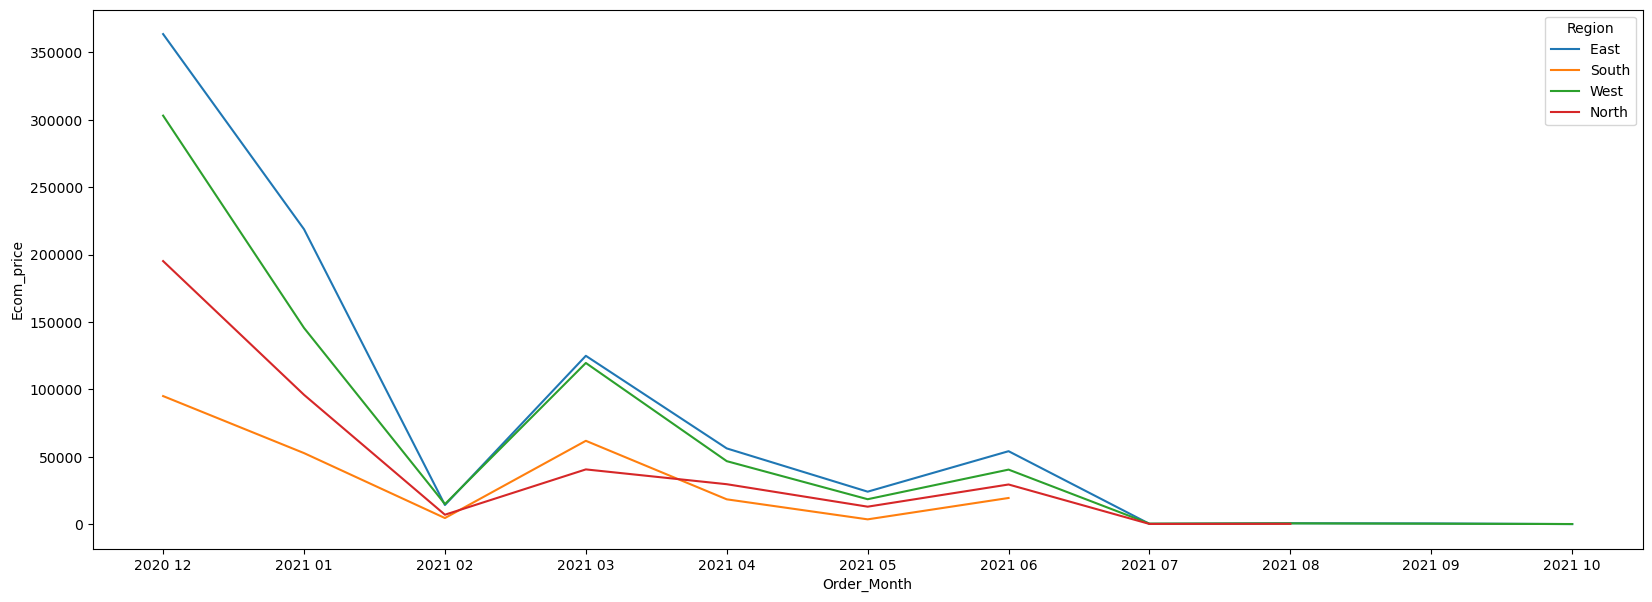

In [25]:
plt.figure(figsize = (20,7))
#plt.xticks(np.arange(0, len('months')+7, 1))
#plt.xlim(1, 12)
ECom_data_Add_New.sort_values(by='Order_Month', ascending=True, inplace=True)
plt.xticks(np.arange(0,14,1))
sns.lineplot(data=ECom_data_Add_New,x = 'Order_Month' , y = 'Ecom_price', ci = False ,hue='Region');
plt.show()